# Appliance Energy Prediction: Data Analysis and Model Evaluation

## Introduction
In this project, I analyze the energy consumption of household appliances using environmental and operational data. The dataset contains features such as temperature, humidity, visibility, and wind speed, recorded alongside the appliance energy usage. My objective is to explore how these variables influence energy consumption and to build predictive models that can accurately estimate appliance energy usage.

## Problem Statement
Managing appliance energy usage efficiently can be challenging due to the influence of external environmental conditions. Without proper insights, it’s hard to optimize consumption and reduce energy costs. Through this project, I aim to predict appliance energy usage based on surrounding environmental data, helping to uncover patterns and inform smarter energy decisions.

## Objectives
- To clean and prepare the dataset for effective analysis and modeling.

- To perform exploratory data analysis (EDA) and identify important features influencing appliance energy usage.

- To apply and evaluate multiple predictive modeling techniques, including:

      - Linear Regression using statsmodels for statistical interpretability

      - Regularized models 

      - Tree-based models (e.g., Decision Trees, Random Forest, Gradient Boosting)

- To compare model performance using appropriate regression metrics (R² score, RMSE, MAE).

- To visualize the results and identify the best-performing model for appliance energy prediction.

## Tools and Libraries I Used
- Python: For scripting and data processing

- Pandas: For data cleaning and manipulation

- Matplotlib & Seaborn: For data visualization

- Statsmodels: For detailed statistical regression analysis

- Scikit-learn: For implementing and evaluating various machine learning models

- NumPy: For numerical computations

## Columns info
   - date time year-month-day hour:minute:second
   - Appliances, energy use in Wh (target variable for prediction)
   - lights, energy use of light fixtures in the house in Wh
   - T1, Temperature in kitchen area, in Celsius
   - RH_1, Humidity in kitchen area, in %
   - T2, Temperature in living room area, in Celsius
   - RH_2, Humidity in living room area, in %
   - T3, Temperature in laundry room area
   - RH_3, Humidity in laundry room area, in %
   - T4, Temperature in office room, in Celsius
   - RH_4, Humidity in office room, in %
   - T5, Temperature in bathroom, in Celsius
   - RH_5, Humidity in bathroom, in %
   - T6, Temperature outside the building (north side), in Celsius
   - RH_6, Humidity outside the building (north side), in %
   - T7, Temperature in ironing room , in Celsius
   - RH_7, Humidity in ironing room, in %
   - T8, Temperature in teenager room 2, in Celsius
   - RH_8, Humidity in teenager room 2, in %
   - T9, Temperature in parents room, in Celsius
   - RH_9, Humidity in parents room, in %
   - To, Temperature outside (from Chievres weather station), in Celsius
   - Pressure (from Chievres weather station), in mm Hg
   - RH_out, Humidity outside (from Chievres weather station), in %
   - Wind speed (from Chievres weather station), in m/s
   - Visibility (from Chievres weather station), in km
   - Tdewpoint (from Chievres weather station), Â°C
   - rv1, Random variable 1, nondimensional
   - rv2, Random variable 2, nondimensional



### (i) Data Ingestion

In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [30]:
# load data as dataframe
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [13]:
# check the info of the dataframe
df.info()

int_cols = df.select_dtypes(include=['int64', 'int32']).shape[1]
float_cols = df.select_dtypes(include=['float64', 'float32']).shape[1]
object_cols = df.select_dtypes(include=['object']).shape[1]

print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'Number of integer columns: {int_cols}')
print(f'Number of float columns: {float_cols}')
print(f'Number of object columns: {object_cols}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [31]:
# check for columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### (ii) Data Preprocessing

In [15]:
# check for missing values
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicated rows: {num_duplicates}')

if num_duplicates==0:
    print('The dataframe has no duplicates, proceed to the next steps')

else:
    print('Drop the duplicates before proceeding')


Number of duplicated rows: 0
The dataframe has no duplicates, proceed to the next steps


In [16]:
# check for missing values
missing_values = df.isna().sum()
total_missing = missing_values.sum()
if total_missing ==0:
    print('No missing values, proceed!')
else:
    print('Clean the missing values before proceeding')

No missing values, proceed!


### (iii) Exploratory Data Analysis

In [17]:
# check for the descriptive statistics for numerical columns
df.describe()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


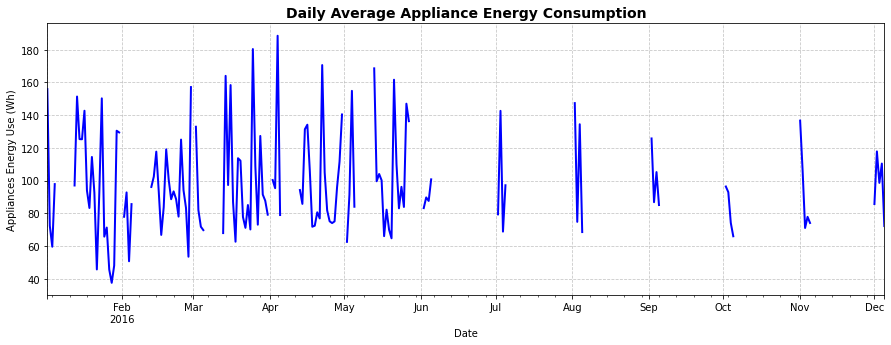

In [18]:
# Plot a line graph of Daily Trend of Appliance Energy Consumption

# Convert 'date' column to datetime and set it as the index
#df.rename(columns={' date': 'date'}, inplace=True)  # Fix leading space
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample to compute the daily average energy consumption
daily_usage = df['Appliances'].resample('D').mean()

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))
daily_usage.plot(ax=ax, color='blue', linewidth=2)

# Enhance visualization
ax.set_title('Daily Average Appliance Energy Consumption', fontsize=14, fontweight='bold')
ax.set_ylabel('Appliances Energy Use (Wh)')
ax.set_xlabel('Date')
ax.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


_summary_

Throughout the year, daily energy usage averages around 110 Wh, with occasional spikes pushing consumption up to 180 Wh and the lowest usage dipping to 40 Wh.

The first half of the year (January–June) is marked by frequent fluctuations, with noticeable peaks and drops in energy use. 

In contrast, the second half (July–December) shows a more consistent and steady trend, with fewer dramatic shifts. This shift in stability may be influenced by seasonal changes or adjustments in appliance usage habits over time.

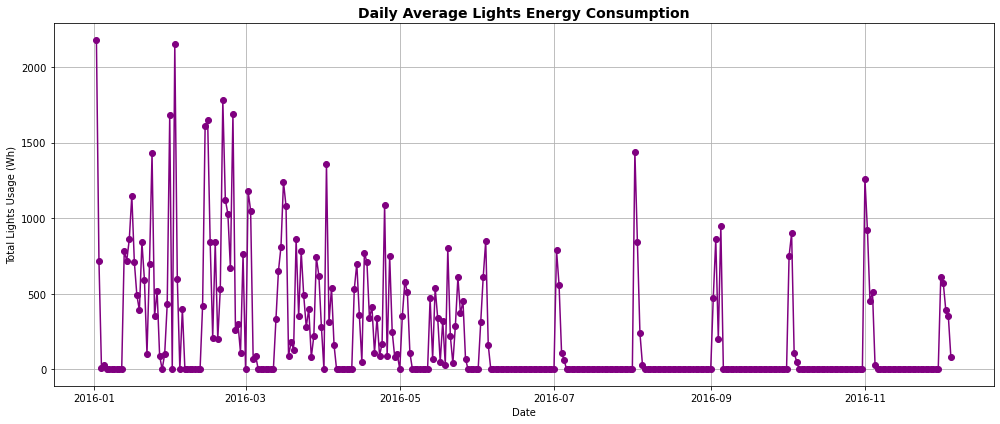

In [21]:
# Plot a line graph of Daily Trend of Lights Energy Consumption

# Resample by day and sum lights usage
daily_lights = df['lights'].resample('D').sum()

# create the Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_lights.index, daily_lights.values, marker='o', linestyle='-', color='purple')

# Enhance visualization
plt.title('Daily Average Lights Energy Consumption', fontweight = 'bold', fontsize = 14)
plt.xlabel('Date')
plt.ylabel('Total Lights Usage (Wh)')
plt.grid(True)

# display the plot
plt.tight_layout()
plt.show()


_summary_

The line graph visualizes daily total lights usage (Wh) of days from January to December 2016.

Energy consumption fluctuates significantly, with peaks around 2000 Wh and lows near 0 Wh. 

This highlights variations in lights usage trends over time.

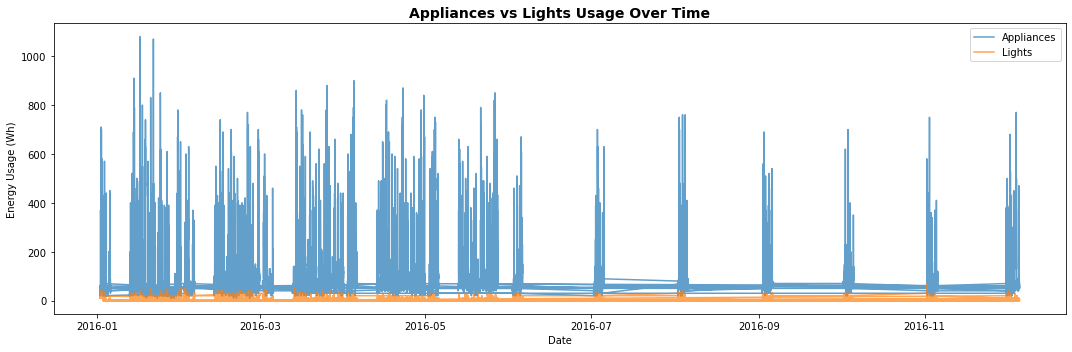

In [ ]:
# Plot a graph of appliances vs lights over a pperiod of time
# Set figure size
plt.figure(figsize=(15, 5))

# Plot appliance and lights energy use over time with transparency
plt.plot(df['date'], df['Appliances'], label='Appliances', alpha=0.7)
plt.plot(df['date'], df['lights'], label='Lights', alpha=0.7)

# Label axes and add title
plt.xlabel('Date')
plt.ylabel('Energy Usage (Wh)')
plt.title('Appliances vs Lights Usage Over Time', fontweight='bold', fontsize = 14)

# Show legend and adjust layout
plt.legend()
plt.tight_layout()

# Display plot
plt.show()


_summary_ 

The graph illustrates the energy consumption trends for lights and appliances over time.  

- **Lights:** Consumption shows periodic fluctuations, likely influenced by seasonal changes and daily usage patterns. Efficiency improvements, such as LED adoption, may contribute to gradual declines.  

- **Appliances:** Energy usage remains more stable but exhibits occasional peaks, possibly due to increased demand from high-power devices. Behavioral factors and technological advancements impact overall consumption.  

Overall, appliances tend to consume more energy consistently, while lights show more variability based on external factors.  

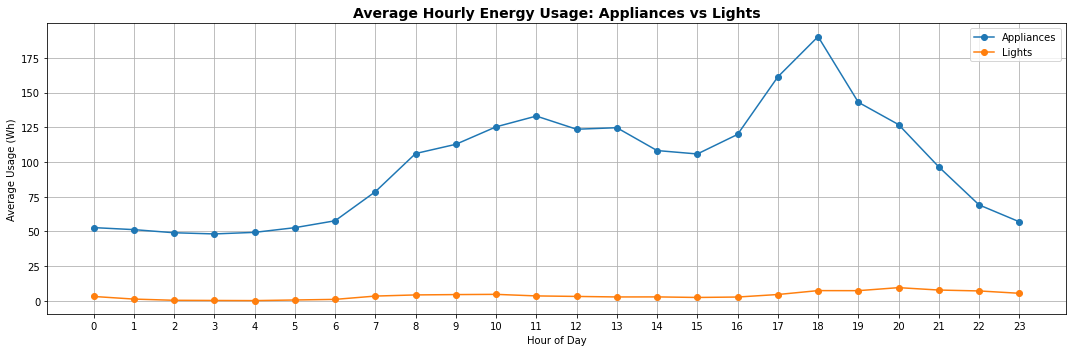

In [ ]:
# Plot a graph of Average energy used by Appliances and Lights
# Get hour from date
df['hour'] = df['date'].dt.hour

# Calculate average usage per hour
hourly_avg = df.groupby('hour')[['Appliances', 'lights']].mean().reset_index()

# Plot average hourly usage for appliances and lights
plt.figure(figsize=(15, 5))
plt.plot(hourly_avg['hour'], hourly_avg['Appliances'], label='Appliances', marker='o')
plt.plot(hourly_avg['hour'], hourly_avg['lights'], label='Lights', marker='o')

# Enhance visualization
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage (Wh)')
plt.title('Average Hourly Energy Usage: Appliances vs Lights', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.grid(True)
plt.xticks(range(24))

#display the plot
plt.tight_layout()
plt.show()


_summary_

This graph shows the **hourly trends** of energy consumption for appliances and lights.

- **Appliances (Blue Line):** Energy usage fluctuates throughout the day, peaking around hour **17**.
- **Lights (Orange Line):** Consumption remains relatively **low and stable**, with minor variations.

Appliance energy usage shows **clear peak periods**, likely influenced by daily activity patterns, while lighting remains **consistent**.

This data can help in optimizing energy efficiency strategies.

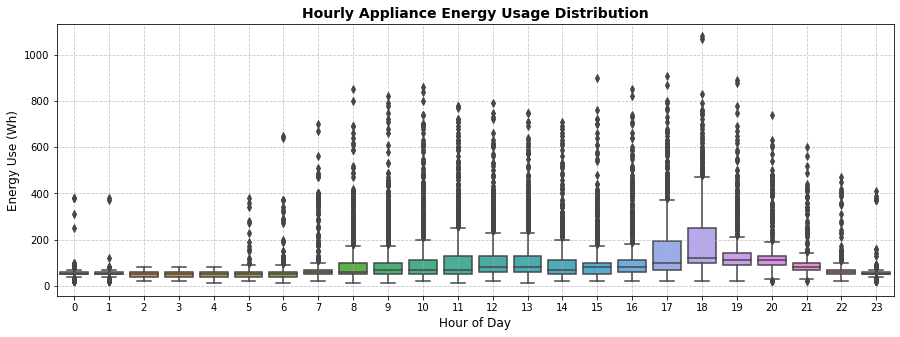

In [ ]:
# plot a boxplot of Energy Consumption Trends by Hour

# Extract the hour from the datetime index
df['hour'] = df.index.hour  

# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(15, 5))

# Create a boxplot within the defined figure
sns.boxplot(x=df['hour'], y=df['Appliances'], ax=ax)  

# Enhance visualization
ax.set_title('Hourly Appliance Energy Usage Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Energy Use (Wh)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)  

# display the plot
plt.show()

_Summary_

- 00:00 – Median: 50 Wh, Outliers: 400 Wh
- 01:00 – Median: 45 Wh, Outliers: 300 Wh
- 02:00 – Median: 40 Wh, Outliers: 350 Wh
- 03:00 – Median: 40 Wh, Outliers: 300 Wh
- 04:00 – Median: 45 Wh, Outliers: 300 Wh
- 05:00 – Median: 50 Wh, Outliers: 350 Wh
- 06:00 – Median: 60 Wh, Outliers: 650 Wh
- 07:00 – Median: 80 Wh, Outliers: 700 Wh
- 08:00 – Median: 100 Wh, Outliers: 850 Wh
- 09:00 – Median: 110 Wh, Outliers: 880 Wh
- 10:00 – Median: 120 Wh, Outliers: 800 Wh
- 11:00 – Median: 120 Wh, Outliers: 850 Wh
- 12:00 – Median: 120 Wh, Outliers: 800 Wh
- 13:00 – Median: 115 Wh, Outliers: 750 Wh
- 14:00 – Median: 110 Wh, Outliers: 700 Wh
- 15:00 – Median: 110 Wh, Outliers: 900 Wh
- 16:00 – Median: 100 Wh, Outliers: 950 Wh
- 17:00 – Median: 110 Wh, Outliers: 950 Wh
- 18:00 – Median: 130 Wh, Outliers: 1050 Wh
- 19:00 – Median: 125 Wh, Outliers: 900 Wh
- 20:00 – Median: 120 Wh, Outliers: 800 Wh
- 21:00 – Median: 110 Wh, Outliers: 750 Wh
- 22:00 – Median: 80 Wh, Outliers: 600 Wh
- 23:00 – Median: 60 Wh, Outliers: 400 Wh


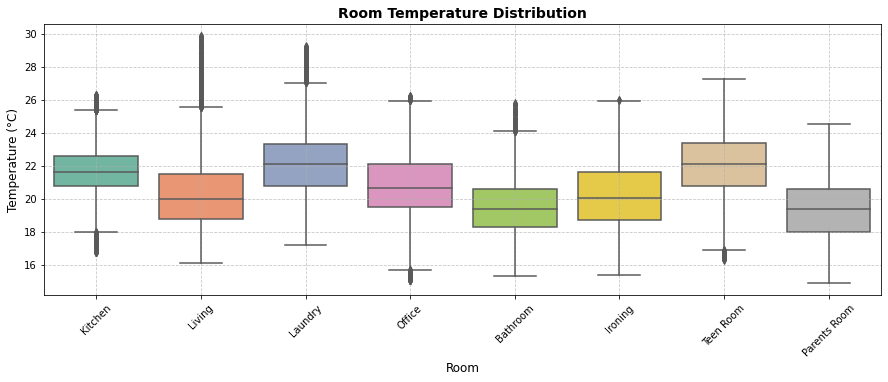

In [ ]:
# Plot a Boxplot of Room Temperatures Distribution

# Select temperature columns and rename them for better readability
room_temps = df[['T1','T2','T3','T4','T5','T7','T8','T9']].rename(columns={
    'T1': 'Kitchen', 'T2': 'Living', 'T3': 'Laundry', 'T4': 'Office',
    'T5': 'Bathroom', 'T7': 'Ironing', 'T8': 'Teen Room', 'T9': 'Parents Room'
})

# Reshape the dataframe for easier plotting
room_temp_melt = room_temps.melt(var_name='Room', value_name='Temperature')

# Create figure and axis with custom size
fig, ax = plt.subplots(figsize=(15, 5))

# Generate a boxplot to visualize temperature distribution across rooms
sns.boxplot(data=room_temp_melt, x='Room', y='Temperature', ax=ax, palette='Set2')

# Enhance visualization
ax.set_title('Room Temperature Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Room', fontsize=12) 
ax.set_ylabel('Temperature (°C)', fontsize=12) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
ax.grid(True, linestyle='--', alpha=0.7)  

# display plot
plt.show()


_summary:_

Kitchen: Stable around 22°C with some hot and cold outliers.

Living: median near 20°C with hot outliers.

Laundry: median about 22.5°C with some hot outliers.

Office: median around 21.5°C with some few hot and cold outliers.

Bathroom: median close to 21°C with some hot outliers.

Ironing : median about 20.5°C.

Teenroom: median near 23°C with few cold outliers.

Parents Room: median around 20°C.

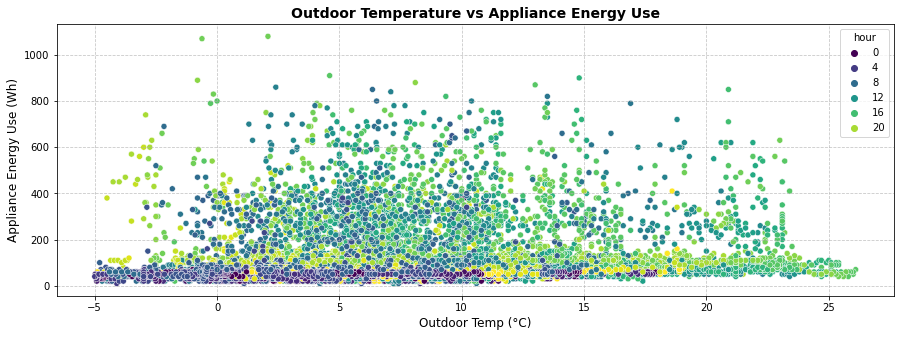

In [ ]:
# plot a boxplot of Outdoor Temperature vs Appliance Energy Use

# Create figure with custom size
fig, ax = plt.subplots(figsize=(15, 5))

# Scatter plot showing relationship between outdoor temperature and appliance energy use
sns.scatterplot(x=df['T_out'], y=df['Appliances'], hue=df['hour'], palette='viridis', ax=ax)

# Enhance visualization
ax.set_title('Outdoor Temperature vs Appliance Energy Use', fontsize=14, fontweight='bold')
ax.set_xlabel('Outdoor Temp (°C)', fontsize=12)
ax.set_ylabel('Appliance Energy Use (Wh)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# display plot
plt.show()

_summary_

- Energy use is mostly concentrated below 200 Wh, suggesting that appliances generally consume lower energy across different temperatures.
- Higher energy consumption (above 200 Wh) is less frequent, appearing sporadically across the dataset.
- There is no clear linear relationship between temperature and energy use, but certain trends might emerge upon deeper analysis.
- Hourly variations in energy use can be seen through the color coding, indicating potential patterns in appliance usage throughout the day.


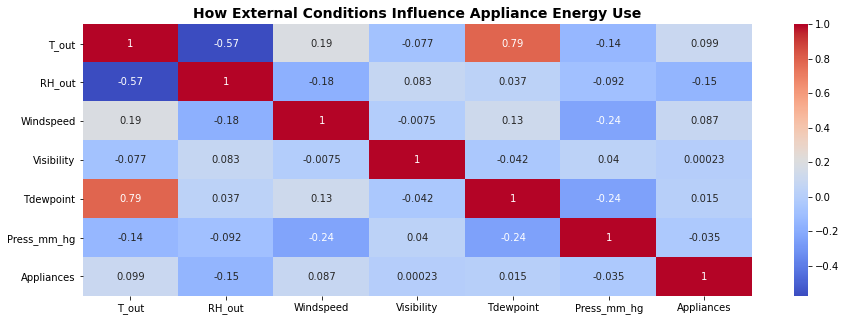

In [ ]:

# Create figure with custom size
fig, ax = plt.subplots(figsize=(15, 5))

# Select relevant external variables
external_vars = df[['T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Press_mm_hg', 'Appliances']]

# Create the heatmap
sns.heatmap(external_vars.corr(), annot=True, cmap='coolwarm', ax=ax)

# Enhance visualization
ax.set_title('How External Conditions Influence Appliance Energy Use', fontsize=14, fontweight='bold')

# display the plot
plt.show()


_summary_
- Outdoor temperature has a slight positive correlation with appliance energy use, meaning energy consumption tends to increase slightly as temperature rises.
- Humidity (RH_out) has a moderate negative correlation with temperature, suggesting that higher temperatures often come with lower humidity levels.
- Dew point temperature strongly aligns with outdoor temperature, as expected, since they both reflect moisture levels in the air.
- Wind speed, visibility, and atmospheric pressure show weak correlations with appliance energy use, meaning they don’t significantly influence consumption patterns.


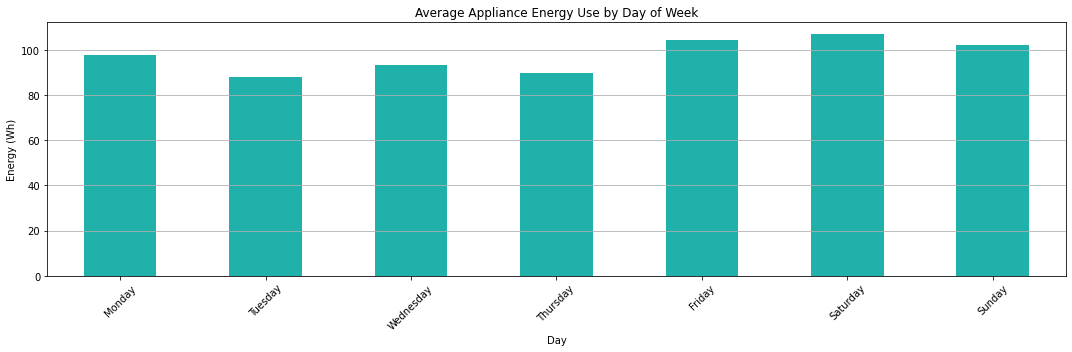

In [ ]:
# Plot bar graph of average appliance energy use by day of week

# If 'date' is in the index, reset it
df = df.reset_index()  # Safe to use, won't hurt if it's not already the index

# Now convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract weekday info
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Group by day name
grouped = df.groupby('day_name')['Appliances'].mean()

# Reorder days
grouped = grouped.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
])

# display Plot
plt.figure(figsize=(15, 5))
grouped.plot(kind='bar', color='lightseagreen')
plt.title('Average Appliance Energy Use by Day of Week')
plt.xlabel('Day')
plt.ylabel('Energy (Wh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


_summary_

Energy use changes a bit from day to day, but nothing too extreme. Some days show a little more activity, probably because of how people go about their routines. Weekends and weekdays seem to have different energy needs—like more appliances being used on days off. 

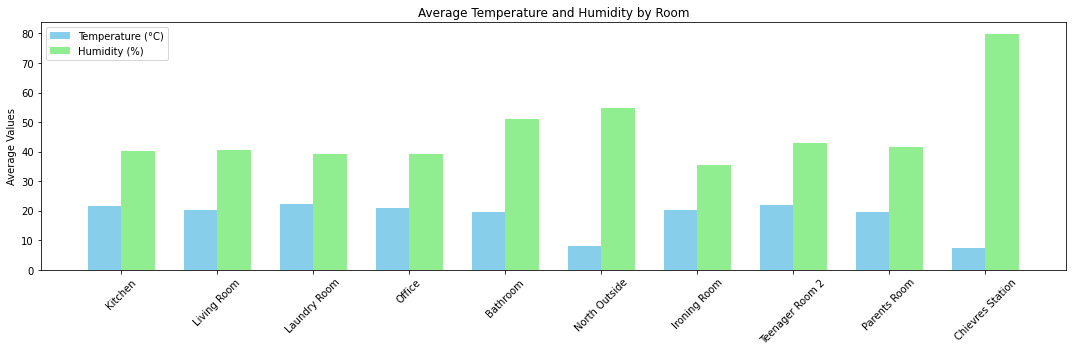

In [ ]:
# Plot a graph of Average temperature and humidity by room

# Sample room labels and corresponding temperature and humidity columns
rooms = ['Kitchen', 'Living Room', 'Laundry Room', 'Office', 'Bathroom',
         'North Outside', 'Ironing Room', 'Teenager Room 2', 'Parents Room', 'Chievres Station']
temperature_cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out']
humidity_cols = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9','RH_out']

# Compute mean temperature and humidity for each room using pandas
avg_temperatures = df[temperature_cols].mean().values
avg_humidities = df[humidity_cols].mean().values

# Bar plot settings
x = np.arange(len(rooms))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x - width/2, avg_temperatures, width, label='Temperature (°C)', color='skyblue')
ax.bar(x + width/2, avg_humidities, width, label='Humidity (%)', color='lightgreen')

# Enhance visualization
ax.set_ylabel('Average Values')
ax.set_title('Average Temperature and Humidity by Room')
ax.set_xticks(x)
ax.set_xticklabels(rooms, rotation=45)
ax.legend()

# display the plot
plt.tight_layout()
plt.show()

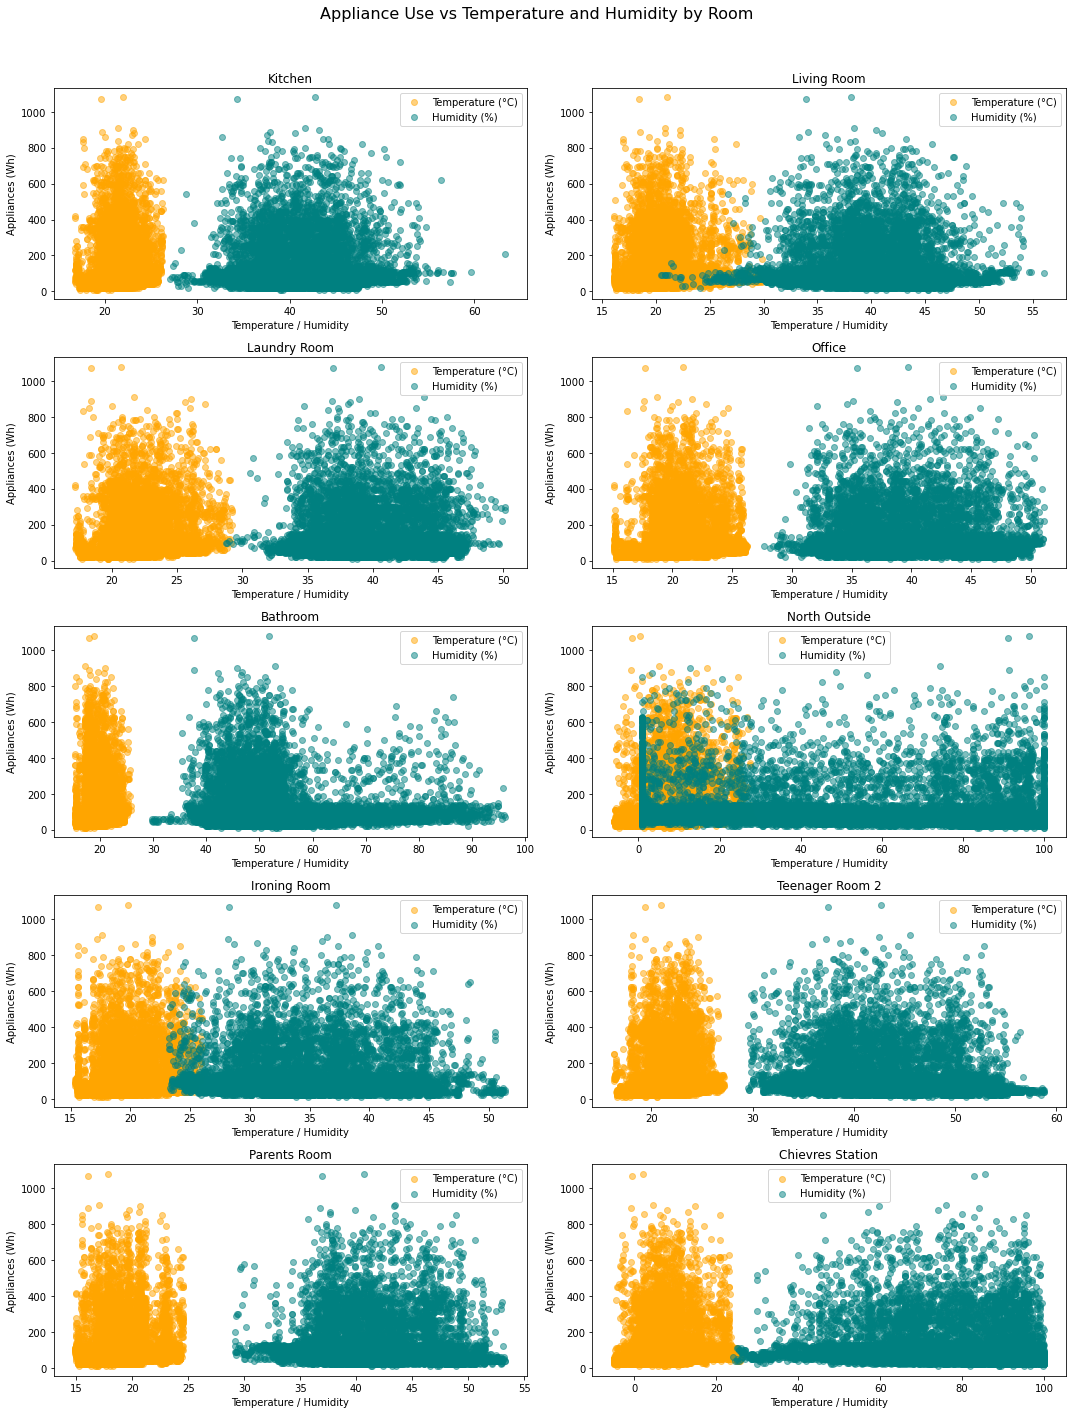

In [ ]:


# Define the room names and their corresponding temperature and humidity columns
rooms = ['Kitchen', 'Living Room', 'Laundry Room', 'Office', 'Bathroom',
         'North Outside', 'Ironing Room', 'Teenager Room 2', 'Parents Room', 'Chievres Station']
temperature_cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out']
humidity_cols = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9','RH_out']

# Set up the figure for subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Appliance Use vs Temperature and Humidity by Room', fontsize=16)

# Loop through each room to plot its temperature and humidity vs appliance use
for i in range(len(rooms)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Scatter plot for temperature
    ax.scatter(df[temperature_cols[i]], df['Appliances'], color='orange', alpha=0.5, label='Temperature (°C)')

    # Scatter plot for humidity
    ax.scatter(df[humidity_cols[i]], df['Appliances'], color='teal', alpha=0.5, label='Humidity (%)')

    ax.set_title(rooms[i])
    ax.set_xlabel('Temperature / Humidity')
    ax.set_ylabel('Appliances (Wh)')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust for suptitle
plt.show()


_summary_

- General Trend: In most rooms, higher temperature and humidity levels are loosely associated with increased appliance energy consumption, although the correlation is not strong.

- Kitchen & Laundry Room: These rooms show relatively higher appliance usage across a broader temperature and humidity range, reflecting active appliance use.

- Bathroom & Outside Areas: Show less clear trends; external environments (like North Outside and Chivres Station) have wide humidity variation with scattered appliance usage.

- Teenager Rooms, Living Room, and Office: Show moderate appliance usage across typical indoor temperature and humidity levels, with some peaks.

- Parents Room: Shows dense clustering of low appliance use with minor variance in temperature/humidity, suggesting limited appliance activity.

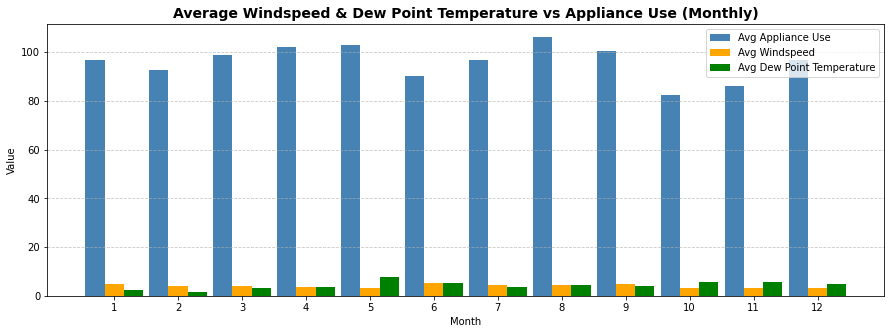

In [32]:
# plot a graph of Average Windspeed & Dew Point Temperature vs Appliance Use (Monthly)

# Convert the date column to datetime format
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month

# Compute monthly averages
monthly_avg = df.groupby("month").agg({"Appliances": "mean", "Windspeed": "mean", "Tdewpoint": "mean"}).reset_index()

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot Appliance Use
ax.bar(monthly_avg["month"] - 0.3, monthly_avg["Appliances"], width=0.3, label="Avg Appliance Use", color="steelblue")

# Plot Windspeed
ax.bar(monthly_avg["month"], monthly_avg["Windspeed"], width=0.3, label="Avg Windspeed", color="orange")

# Plot Dew Point Temperature
ax.bar(monthly_avg["month"] + 0.3, monthly_avg["Tdewpoint"], width=0.3, label="Avg Dew Point Temperature", color="green")

# Label the axes and title
ax.set_xlabel("Month")
ax.set_ylabel("Value")
ax.set_title("Average Windspeed & Dew Point Temperature vs Appliance Use (Monthly)", fontweight = 'bold', fontsize = 14)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

# display the plot
plt.xticks(monthly_avg["month"])  # Ensure month labels are correctly displayed
plt.show()

_summary_

August shows peak appliance use, likely due to summer heat or increased activity during vacation season.

Weather factors like high dew point (humidity) and windspeed may influence appliance demand, especially cooling systems.

While other months are less clear, the trend hints at seasonal effects on energy usage.

Conclusion: Appliance demand peaks in summer, likely driven by weather conditions. More data is needed to confirm this link.